# **Desempeño de Estudiantes en Matematica**

Enlace al conjunto de datos original: https://www.kaggle.com/datasets/adilshamim8/math-students/data, https://www.openml.org/search?type=data&sort=runs&id=42352&status=active


El conjunto de datos utilizado describe el rendimiento académico de estudiantes de matemáticas pertenecientes a dos escuelas secundarias de Portugal: Gabriel Pereira (GP) y Mousinho da Silveira (MS). Incluye información vinculada al desempeño académico, el nivel educativo de los padres, condiciones del hogar, actividades extracurriculares y distintos aspectos del estilo de vida de los estudiantes.

Este dataset surge de un estudio realizado por Paulo Cortez, presentado en la conferencia FUBUTEC 2008, y fue recopilado a partir de registros escolares oficiales y cuestionarios respondidos por los alumnos. Desde su publicación, ha sido utilizado en múltiples estudios académicos y en el análisis de políticas educativas.
El estudio original contempla tanto matemáticas como lengua portuguesa; en este trabajo se emplea una versión reducida enfocada exclusivamente en matemáticas.


El conjunto de datos contiene 399 filas y 33 columnas.
No hay valores faltantes en el dataset original.
Hay 28 variables categoricas (de las cuales 13 son booleanas) y 5 variables numericas.

* **school** - escuela del estudiante (booleano: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)  
* **sex** - sexo del estudiante (booleano: 'F' - femenino o 'M' - masculino)  
* **age** - edad del estudiante (numérico: de 15 a 22)  
* **address** - tipo de dirección del hogar del estudiante (booleano: 'U' - urbana o 'R' - rural)  
* **famsize** - tamaño de la familia (booleano: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)  
* **Pstatus** - estado civil de convivencia de los padres (booleano: 'T' - viven juntos o 'A' - separados)  
* **Medu** - nivel educativo de la madre (numérico: 0 - ninguno, 1 - educación primaria (hasta 4° grado), 2 - de 5° a 9° grado, 3 - secundaria o 4 - educación superior)  
* **Fedu** - nivel educativo del padre (numérico: 0 - ninguno, 1 - educación primaria (hasta 4° grado), 2 - de 5° a 9° grado, 3 - secundaria o 4 - educación superior)  
* **Mjob** - ocupación de la madre (nominal: 'teacher' - docente, 'health' - área de salud, 'services' - servicios civiles como administrativo o policía, 'athome' - ama de casa o 'other' - otra)  
* **Fjob** - ocupación del padre (nominal: 'teacher' - docente, 'health' - área de salud, 'services' - servicios civiles como administrativo o policía, 'athome' - ama de casa o 'other' - otra)  
* **reason** - motivo para elegir esta escuela (nominal: cerca del 'home' - hogar, 'reputation' - reputación de la escuela, preferencia por el 'course' - curso o 'other' - otro)  
* **guardian** - tutor del estudiante (nominal: 'mother' - madre, 'father' - padre o 'other' - otro)  
* **traveltime** - tiempo de viaje de casa a la escuela (numérico: 1 a 4 horas)  
* **studytime** - tiempo de estudio semanal (numérico: 1 a 10 horas)  
* **failures** - cantidad de veces que desaprobo matematicas en el pasado (numérico: n si tiene una o más)  
* **schoolsup** - apoyo educativo extra (booleano: yes - sí o no - no)  
* **famsup** - apoyo educativo por parte de la familia (booleano: yes - sí o no - no)  
* **paid** - clases extras pagas dentro del curso (Matemática o Portugués) (booleano: yes - sí o no - no)  
* **activities** - participación en actividades extracurriculares (booleano: yes - sí o no - no)  
* **nursery** - asistió al jardín de infantes (booleano: yes - sí o no - no)  
* **higher** - desea seguir educación superior (booleano: yes - sí o no - no)  
* **internet** - acceso a Internet en el hogar (booleano: yes - sí o no - no)  
* **romantic** - tiene una relación amorosa (booleano: yes - sí o no - no)  
* **famrel** - calidad de las relaciones familiares (numérico: de 1 - muy malas a 5 - excelentes)  
* **freetime** - tiempo libre después de la escuela (numérico: de 1 - muy poco a 5 - mucho)  
* **goout** - salidas con amigos (numérico: de 1 - muy pocas a 5 - muchas)  
* **Dalc** - consumo de alcohol durante la semana laboral (numérico: de 1 - muy bajo a 5 - muy alto)  
* **Walc** - consumo de alcohol durante el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)  
* **health** - estado actual de salud (numérico: de 1 - muy malo a 5 - muy bueno)  
* **absences** - cantidad de ausencias escolares (numérico: de 0 a 93)  
* **G1** - nota del primer período (numérico: de 0 a 20)  
* **G2** - nota del segundo período (numérico: de 0 a 20)  
* **G3** - nota final (numérico: de 0 a 20, variable objetivo)







**Planteamiento del problema**

El objetivo del trabajo es predecir si un estudiante aprobará o no la materia Matemáticas, en función de su rendimiento académico previo, su comportamiento y su estilo de vida dentro y fuera del ámbito escolar.

Para ello, se define un problema de clasificación binaria, donde:



*   Target: Variable derivada de G3, que indica si el alumno aprueba (G3 > 12) o no aprueba (G3 ≤ 12).
*   Tipo de problema: Clasificación.
*   Modelo principal utilizado: Regresión logística.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.compose import ColumnTransformer


Transformamos la variable G3 de numerica a categorica:      
0 desaprobado         
1 aprobado        
Nota requerida >= 12        
Nota maxima = 20

In [ ]:
# @title Lectura CSV y binarización de G3
df = pd.read_csv('Math-Students.csv')
df['G3'] = df['G3'].apply(lambda x: 0 if x < 12 else 1)

# **Benchmark**

In [ ]:
x = df['G1'].values
y = df['G3'].values
x = x.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lg = LogisticRegression(penalty= None)

lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
y_proba = lg.predict_proba(x_test)[:, 1]

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'AUC: {roc_auc_score(y_test, y_proba):.4f}')

Accuracy: 0.8750
AUC: 0.9342


El benchamark que hicimos es una regresion logitica sin ninguna penalidad, que solo recibe el atributo 'G1'. El benchmark nos dio un accuracy de 0.875 y un AUC de 0.9342

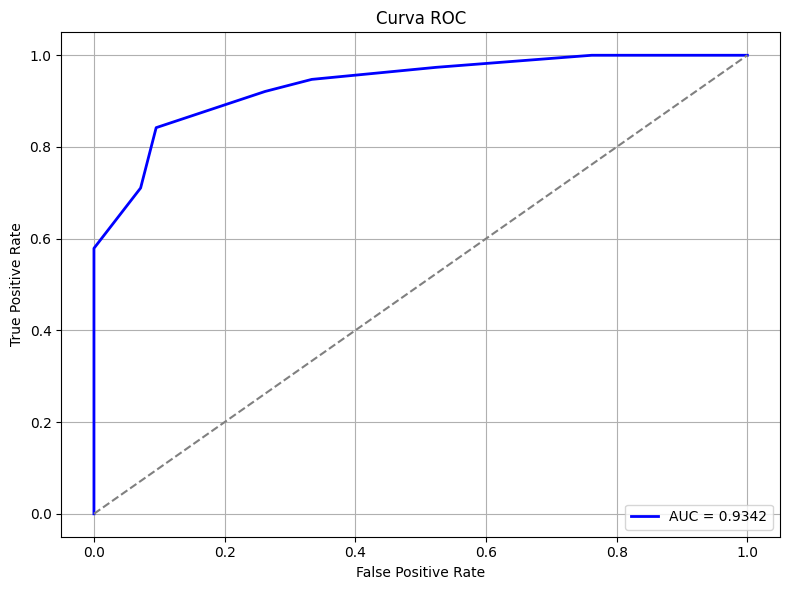

In [ ]:
# @title Gráfico Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Primer modelo de Machine Learning ccon un máximo de 2 (dos)
atributos.**

In [ ]:
# Seleccionamos nuestras variables a usar y el target

x = df[['G1','failures']]
y = df['G3']


# Armamos los pipelines y el preprocesamiento

pipe_g1 = Pipeline([
    ('Mn_scaler', (MinMaxScaler(feature_range=(0,1))))
])
pipe_fail = Pipeline([
    ('St_scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('pipe_g1', pipe_g1, ['G1']),
    ('pipe_fail', pipe_fail, ['failures'])
])

# Armamos el modelo

model = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Y ahora lo evaluamos
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


**Evaluación del Modelo**

In [ ]:
# @title
# Accuracy
print(f'Accuracy: {model.score(x_test, y_test):.4f}')

# AUC
y_scores = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)
print(f'AUC: {auc:.4f}')

Accuracy: 0.8750
AUC: 0.9361


In [ ]:
from sklearn.model_selection import cross_validate
resultados = cross_validate(model, x, y, cv=5,
                         scoring=['accuracy', 'roc_auc'],
                         return_train_score=False)

for metric in ['test_accuracy', 'test_roc_auc']:
    print(f"{metric[5:].capitalize():<10}: {resultados[metric].mean():.3f} ± {resultados[metric].std():.3f}")

Accuracy  : 0.882 ± 0.015
Roc_auc   : 0.947 ± 0.009


El modelo luego de su entrenamiento fue evaluado por medio del Accuracy y por AUC. Los dos mecanismos trabajan sobre la matriz de confusión, que nos es óptimo para casos de clasificación.
  
Luego de entrenar y evaluar nuestro modelo de dos atributos, tenemos como resultado un   
Accuracy: 0.875       
AUC: 0.9361

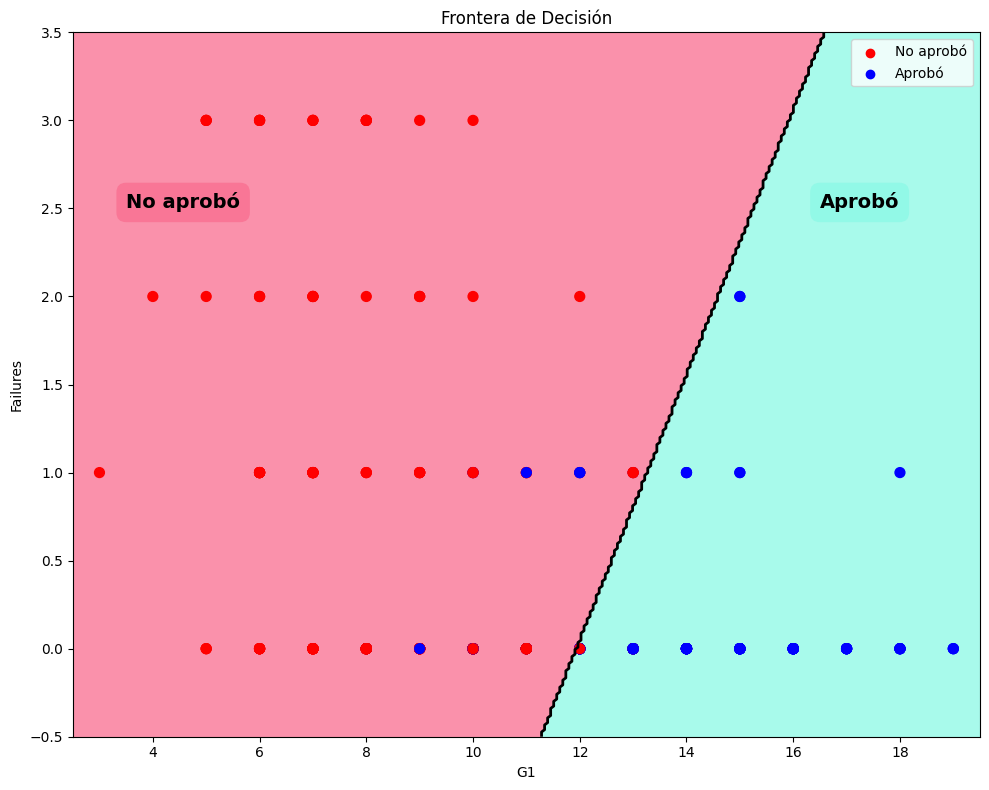

In [ ]:
# Creamos la malla de puntos para el grafico
x_min, x_max = x['G1'].min() - 0.5, x['G1'].max() + 0.5
y_min, y_max = x['failures'].min() - 0.5, x['failures'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Creamos una grilla (dataframe) con la malla para poder usar el pipline
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['G1', 'failures'])

# Predecimos clases ('No aprobo' o 'Aprobó')
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

# Armamos el grafico
plt.figure(figsize=(10, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Creamos el fondo de cada clase
plt.contourf(xx, yy, Z, levels=[-0.1, 0.5, 1.1]
             , colors=['#f97696','#92f9e7']
             , alpha=0.8)

# Frontera de decisión
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Define color mapping: 0 (No aprobó) -> red, 1 (Aprobó) -> blue
color_map = {0: 'red', 1: 'blue'}
train_colors = [color_map[val] for val in y_train]
test_colors = [color_map[val] for val in y_test]

# Agregamos los puntos de entrenamiento
plt.scatter(x_train['G1'], x_train['failures'], c=train_colors, s=50,
            #label='Entrenamiento'
            )

# Agregamos los Puntos de prueba
plt.scatter(x_test['G1'], x_test['failures'], c=test_colors, s=50,
            #marker='^', label='Prueba'
            )


# Colocamos etiquetas
plt.xlabel('G1')
plt.ylabel('Failures')
plt.title('Frontera de Decisión')
plt.text(x_min + 1, 2.5, 'No aprobó', fontsize=14, color='black', weight='bold',
         bbox=dict(facecolor='#f97696', edgecolor='none', boxstyle='round,pad=0.5'))
plt.text(x_max - 3, 2.5, 'Aprobó', fontsize=14, color='black', weight='bold',
         bbox=dict(facecolor='#92f9e7', edgecolor='none', boxstyle='round,pad=0.5'))
plt.scatter([], [], c='red', label='No aprobó')
plt.scatter([], [], c='blue', label='Aprobó')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


A partir de este grafico podemos interpretar que para aprobar la cursada (G3), si no desaprobaste ninguna clase ('failures') generalmente necesitás una nota del primer examen ('G1') mayor a 12 (la cual es la nota minima para aprobar). Sin embargo aquellos estudiantes que recursaron materias en el pasado tienen menor probabilidad de aprobar la materia con la misma nota en el primer examen.


**Segundo modelo de Machine Learning**

In [ ]:
# Seleccionamos columnas que no vamos a considerar
cols=['G3','G2','reason','guardian','Walc','Fedu']

# Definimos 'x' 'y'
x = df.drop(columns=cols)
y = df['G3']

# Separamos las variables categoricas y numericas de 'x'

# Separamos entre categoricas ordinales y nominales
var_cat = ['school','sex','address','famsize','Pstatus',
           'schoolsup','famsup','paid','activities','nursery','higher',
           'internet','romantic']

var_cat_ord = ['goout','Dalc','Medu','traveltime', 'studytime','famrel','freetime']

#variables numericas
var_num = ['age','failures','absences', 'G1']

var_scaled = var_num + var_cat_ord

# Armamos los pipelines:

# A las categoricas les hacemos OneHotEncoder
pipe_cat = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])
# A las numericas le hacemos StandardScaler para evitar que una variable domine a las demás solo por su escala
pipe_num = Pipeline([
    ('std_scaler', StandardScaler())
])

# Armamos el preprocessor
preprocessor = ColumnTransformer([
    ('pipe_cat', pipe_cat, var_cat),
    ('pipe_num', pipe_num, var_scaled)
])

# Armamos el modelo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

# Separamos train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)



In [ ]:
from sklearn.model_selection import GridSearchCV
# Usamos GridSearchCV para hallar los mejores hiperparametros

param_grid = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
    }

# Usando el pipeline aplicamos GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}


El mejor modelo que podemos utilizar es una regresion logistica con los siguientes parametros:      

*   C = 0.1
*   Penalty = l1
*   Solver = liblinear

**Evaluación del Segundo Modelo**

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

print(f"Mejor accuracy (CV): {grid_search.best_score_:.3f}")
print(f'Score AUC: {roc_auc_score(y_test, y_proba):.3f}')

Mejor accuracy (CV): 0.896
Score AUC: 0.943


Siguiendo la misma forma de evaluar el modelo que en el ejercicio anterior, el mejor accuracy que provee este modelo es 0.896 y el mejor valor de AUC es de 0.943

**Hacemos validación cruzada**

In [ ]:
from sklearn.model_selection import cross_validate

resultados = cross_validate(best_model, x, y, cv=5,
                         scoring=['accuracy', 'roc_auc'],
                         return_train_score=False)

# Calculamos resultados promedios con desviaciones estándar
for metric in ['test_accuracy', 'test_roc_auc']:
    print(f"{metric[5:].capitalize():<10}: {resultados[metric].mean():.3f} ± {resultados[metric].std():.3f}")

Accuracy  : 0.882 ± 0.032
Roc_auc   : 0.951 ± 0.015


Vemos que evaluando el modelo con 5 pliegues, la media del Accuracy es de 0.882 con una desviación estandar de 0.032, lo cual indica que el nuevo modelo tiene un rendimiento consistente en la clasificación.     
Con respecto al AUC, la media nos da un valor de 0.951, con una desviación estandar de 0.015. Esto sugiere que el modelo posee una buena capacidad para distinguir entre clases (aprobado/no aprobado) de manera confiable.  
Estos valores son levemente mejor y mas confiables que los obtenidos en el punto anterior mediante el gridsearch.

**Analisis de Atributos**

In [ ]:
lr = best_model.named_steps['lr']
preprocessor = best_model.named_steps['preprocessor']

cat_features = preprocessor.named_transformers_['pipe_cat'].named_steps['one_hot'].get_feature_names_out(var_cat)
scaled_features = var_scaled
feature_names = np.concatenate([cat_features, scaled_features])

for name, coef in zip(feature_names, lr.coef_[0]):
    print(f"{name}: {coef:.4f}")

school_GP: 0.0000
school_MS: 0.0000
sex_F: 0.0000
sex_M: 0.0000
address_R: 0.0000
address_U: 0.0000
famsize_GT3: 0.0000
famsize_LE3: 0.0000
Pstatus_A: 0.0000
Pstatus_T: 0.0000
schoolsup_no: 0.0000
schoolsup_yes: 0.0000
famsup_no: 0.0000
famsup_yes: 0.0000
paid_no: 0.0000
paid_yes: 0.0000
activities_no: 0.0000
activities_yes: 0.0000
nursery_no: 0.0000
nursery_yes: 0.0000
higher_no: 0.0000
higher_yes: -0.0526
internet_no: 0.0000
internet_yes: 0.0000
romantic_no: 0.0000
romantic_yes: 0.0000
age: -0.1699
failures: 0.0000
absences: -0.0651
G1: 2.4536
goout: 0.0000
Dalc: 0.0000
Medu: 0.0000
traveltime: 0.0000
studytime: 0.0000
famrel: 0.0000
freetime: 0.0000


La mayoria de estos resultados tienden a 0 debido a que esta regresion logistica usa la regularizacion Lasso ('l1') y 'liblinear' para hacer una seleccion automatica de los atributos y considera solo aquellas con mayor importancia correlativa y las que aportan más información predictiva. Algunas variables como 'failures', al hacer un grafico de correlatividad se ve que tiene una relacion con 'G3' sin embargo no aporta nueva informacion ademas de la que posee 'G1' (es la variable con mayor relevancia, lo cual es logico) por lo que el modelo la anula. Pasa algo similar con las otras varibles. Los atributos que el modelo no elimina ('age', 'absences', 'higher_yes'), son los unicos que agregan informacion a la prediccion.

El primer modelo (regresor logístico con G1 y failures como atributos) pareciera ser el que mejor rinde, con un buen accuracy y mucha sencillez en el modelo (pocos atributos, bajo costo computacional)

Para una posible fase operativa, usariamos el modelo logístico con los atributos G1 y failures, ya que ofrece un muy buen equilibrio entre rendimiento y simplicidad. Posee las ventajas respecto al resto de modelos:

Tiene un Accuracy alto, levemente por debajo de modelos más complejos.

Es un modelo facilmente interpretable, lo cual lo hace mas facil a la hora de explicarlo.

Bajo costo computacional, especialmente util para aplicar en entornos con recursos limitados.

Utiliza pocos atributos, lo que facilita la recolección de datos y el mantenimiento del sistema.

Ya que, los otros modelos más complejos, como los basados en la regularización lasso, ofrecen mejoras muy leves, el aumento en complejidad no se justifica.


--------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
cols=['G3','G2','G1','reason','guardian','Walc','Fedu']

# Definimos 'x' 'y'
x = df.drop(columns=cols)
y = df['G3']

# Separamos las variables categoricas y numericas de 'x'

# Separamos entre categoricas ordinales y nominales
var_cat = ['school','sex','address','famsize','Pstatus',
           'schoolsup','famsup','paid','activities','nursery','higher',
           'internet','romantic']

var_cat_ord = ['goout','Dalc','Medu','traveltime', 'studytime','famrel','freetime']

#variables numericas
var_num = ['age','failures','absences']

var_scaled = var_num + var_cat_ord

# Armamos los pipelines:

# A las categoricas les hacemos OneHotEncoder
pipe_cat = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])
# A las numericas le hacemos StandardScaler para evitar que una variable domine a las demás solo por su escala
pipe_num = Pipeline([
    ('std_scaler', StandardScaler())
])

# Armamos el preprocessor
preprocessor = ColumnTransformer([
    ('pipe_cat', pipe_cat, var_cat),
    ('pipe_num', pipe_num, var_scaled)
])

# Armamos el modelo
model = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

# Separamos train-test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Usamos GridSearchCV para hallar los mejores hiperparametros

param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 0.5,0.05],
    'lr__penalty': ['l1'],
    'lr__solver': ['liblinear']
    }

# Usando el pipeline aplicamos GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train2, y_train2)
print("Mejores parámetros:", grid_search.best_params_)
best_model2 = grid_search.best_estimator_
y_pred2 = best_model2.predict(x_test2)
y_proba2 = best_model2.predict_proba(x_test2)[:, 1]

print(f"Mejor accuracy (CV): {grid_search.best_score_:.3f}")
print(f'Score AUC: {roc_auc_score(y_test2, y_proba2):.3f}')

from sklearn.model_selection import cross_validate

resultados = cross_validate(best_model2, x, y, cv=5,
                         scoring=['accuracy', 'roc_auc'],
                         return_train_score=False)

# Calculamos resultados promedios con desviaciones estándar
for metric in ['test_accuracy', 'test_roc_auc']:
    print(f"{metric[5:].capitalize():<10}: {resultados[metric].mean():.3f} ± {resultados[metric].std():.3f}")

Mejores parámetros: {'lr__C': 0.5, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Mejor accuracy (CV): 0.664
Score AUC: 0.664
Accuracy  : 0.639 ± 0.064
Roc_auc   : 0.658 ± 0.102


In [ ]:
lr = best_model2.named_steps['lr']
preprocessor = best_model2.named_steps['preprocessor']

cat_features = preprocessor.named_transformers_['pipe_cat'].named_steps['one_hot'].get_feature_names_out(var_cat)
scaled_features = var_scaled
feature_names = np.concatenate([cat_features, scaled_features])

for name, coef in zip(feature_names, lr.coef_[0]):
    print(f"{name}: {coef:.4f}")

school_GP: 0.0000
school_MS: -0.4868
sex_F: -0.2206
sex_M: 0.0504
address_R: -0.1194
address_U: 0.0000
famsize_GT3: -0.0680
famsize_LE3: 0.1976
Pstatus_A: 0.0000
Pstatus_T: 0.0000
schoolsup_no: 0.0000
schoolsup_yes: -1.3275
famsup_no: 0.0000
famsup_yes: -0.3270
paid_no: 0.0000
paid_yes: 0.0000
activities_no: 0.0000
activities_yes: 0.0000
nursery_no: 0.0000
nursery_yes: 0.0000
higher_no: 0.0000
higher_yes: 0.0000
internet_no: -0.2722
internet_yes: 0.0000
romantic_no: 0.0000
romantic_yes: 0.0000
age: -0.2380
failures: -0.5954
absences: -0.1710
goout: -0.2294
Dalc: 0.0000
Medu: 0.1652
traveltime: -0.1720
studytime: 0.1484
famrel: -0.0708
freetime: 0.0380


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier()
dummy_model.fit(x_train2, y_train2)
y_pred_dummy = dummy_model.predict(x_test2)
# print(f"Accuracy del modelo dummy: {dummy_model.score(x_test, y_test):.3f}")

resultados = cross_validate(dummy_model, x, y, cv=5,
                         scoring=['accuracy', 'roc_auc'],
                         return_train_score=False)

for metric in ['test_accuracy', 'test_roc_auc']:
    print(f"{metric[5:].capitalize():<10}: {resultados[metric].mean():.3f} ± {resultados[metric].std():.3f}")

Accuracy  : 0.594 ± 0.006
Roc_auc   : 0.500 ± 0.000


Descartando G1 hicimos 2 modelos l1 y l2 para ver que tan bien se evalua el modelo. Con l1 nos dio variables q mas influyen en la prediccion (las q no tienden a 0). El dummyclass actua como modelo benchmark

**Conclusion**                            
Es un modelo util totalmente independiente a las notas, y puede servir para predicir al principio de la cursada para saber anticipadamente a q tendiencia vas.

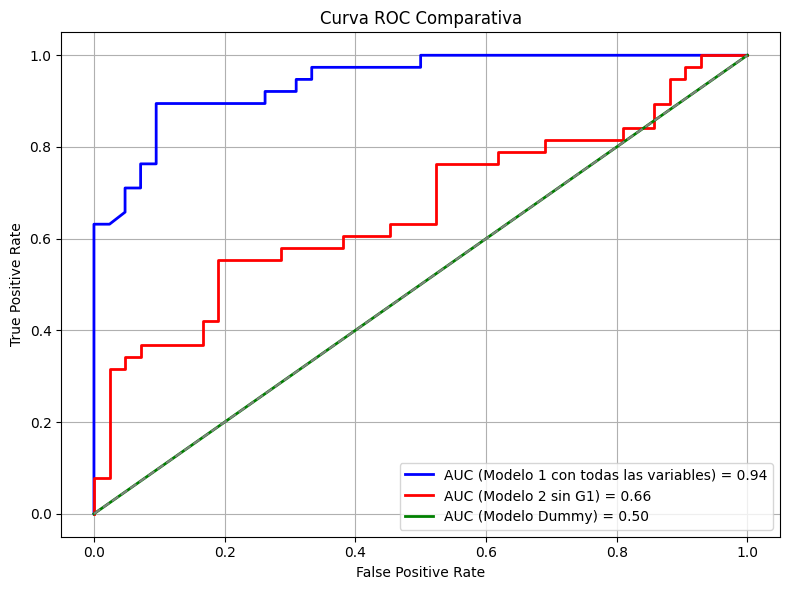

In [ ]:
y_proba2 = best_model2.predict_proba(x_test2)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_proba2)
auc2 = roc_auc_score(y_test2, y_proba2)

y_proba = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

y_proba4 = dummy_model.predict_proba(x_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_proba4)
auc4 = roc_auc_score(y_test, y_proba4)

fig, ax = plt.subplots(figsize=(8, 6))

# Curva ROC para el primer modelo
ax.plot(fpr, tpr, color='blue', label=f'AUC (Modelo 1 con todas las variables) = {auc:.2f}', linewidth=2)

# Curva ROC para el segundo modelo (sin G1)
ax.plot(fpr2, tpr2, color='red', label=f'AUC (Modelo 2 sin G1) = {auc2:.2f}', linewidth=2)

# Curva ROC para el benchmark del modelo 1
ax.plot(fpr4, tpr4, color='green', label=f'AUC (Modelo Dummy) = {auc4:.2f}', linewidth=2)



ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Curva ROC Comparativa')
ax.legend(loc='lower right')
ax.grid(True)
plt.tight_layout()
plt.show()